In [3]:
from run_calibrations import get_database
from dotenv import load_dotenv
load_dotenv('.env-db')
from transformers import LlamaTokenizerFast
tokenizer = LlamaTokenizerFast.from_pretrained('hf-internal-testing/llama-tokenizer')
def count_tokens(prompt):
    return len(tokenizer.tokenize(prompt))

In [16]:
db = get_database()

In [29]:
# reset hanging ratings
coll_name = 'queries/contrast/openchat/openchat_v3.1'
# db[coll_name].update_many({'rating':0}, {'$set':{'rating':-1}})
# get average latency
latencies = list(db[coll_name].find({"latency":{"$gt":0}}))
latencies = [latency['latency'] for latency in latencies]
print(f"Average latency: {sum(latencies)/len(latencies)}")


Average latency: 0.3629837820561454


In [12]:
import tqdm
# display dist. of prompt lengths
dim = 'contrast'
prefixes = {prefix['prefix_index']:prefix for prefix in list(db['prefixes'].find({}))}
prompts = {prompt['prompt_index']:prompt for prompt in list(db[f'core_prompts/{dim}'].find({}))}
samples = {sample['sample_index']:sample for sample in list(db[f'samples/{dim}'].find({}))}
tokens_dist = []
prefix = max(prefixes.values(), key=lambda x : len(x['prefix']))
for prompt in tqdm.tqdm(prompts):
    for sample in samples:
        t = count_tokens(prefix['prefix'] + prompts[prompt]['combined_prompt'] + samples[sample]['sample'])
        tokens_dist.append(t)

100%|██████████| 116/116 [05:58<00:00,  3.09s/it]


<Axes: >

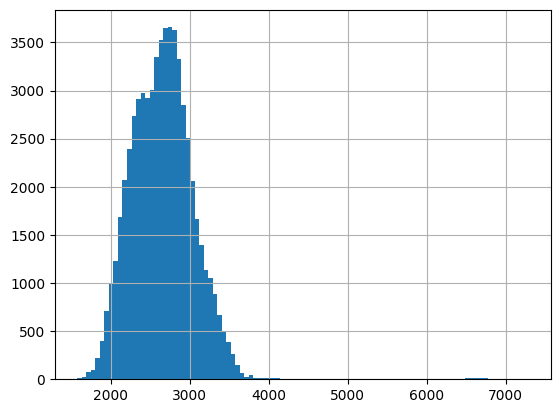

In [15]:
import pandas as pd
pd.Series(tokens_dist).hist(bins=100)